# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


In [7]:
import sys
print(sys.version)
print(sys.version_info)
print("\nPython ver: {}".format( sys.version_info[0]))
help("modules")

3.5.2 | packaged by conda-forge | (default, Jan 19 2017, 15:28:33) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

Python ver: 3

Please wait a moment while I gather a list of all available modules...

CDROM               binascii            json                selectors
DLFCN               binhex              jsonschema          setuptools
IN                  bisect              jupyter             shelve
IPython             bleach              jupyter_client      shlex
OleFileIO_PL        builtins            jupyter_console     shutil
OpenSSL             bz2                 jupyter_core        signal
PIL                 cProfile            keras               simplegeneric
PyQt4               calendar            keyword             sip
TYPES               certifi             lib2to3             sipconfig
__future__          cffi                linecache           sipdistutils
_ast                cgi                

## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). 

* The `sample_id` is the id for an image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 0:
Image - Min Value: 5 Max Value: 225
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


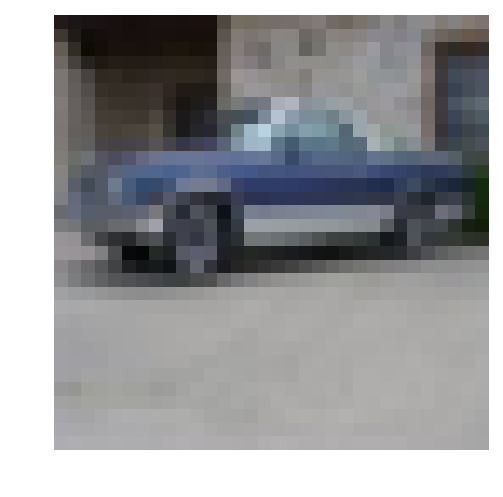

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2 # Possible Batch Ids: [1, 2, 3, 4, 5]
sample_id = 0 # 0 to max is 9,999
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [10]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # return None
    # x is a numpy.ndarray
    # print(x.shape) #(499, 32, 32, 3)
    #print(x)
    '''
    [[[[ 87 112 177]
   [ 90  69 177]
   [ 15   9  87]
   ..., 
   [189 174 255]
   [ 85 254 129]
   [ 37 183 222]]
    '''
    # range of 0 to 1
    a = 0
    b = 1
    
    # being an image I will assume 0 to 255
    color_scale_min = np.amin(x) #0
    color_scale_max = np.amax(x) #255
    
    # store old shape of tensor
    dimensions = x.shape  # <class 'tuple'>, len(x.shape) = 4 dimensions
    
    # reshape to a single vector array
    image_data = x.reshape(-1, 1)
    
    # normalize
    image_data = a + ( ( (image_data - color_scale_min)*(b - a) )/( color_scale_max - color_scale_min ) )

    # convert back to tensor 
    x = image_data.reshape(dimensions)
    return x
   

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [11]:
#replaced with one above

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # Please note: I was struggling with running this twice and the forum mentor (@akansha_803081651828) 
    # kindly explained I needed to fix the array size to the size of the classes (dog, cat, etc...)
    # https://discussions.udacity.com/t/assertion-error-in-one-hot-encoding/226204/2?source_topic_id=224916

    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
    # there are 10 classes in the label feature in our array, 
    # however if we rerun this we may find that not all features are included (e.g. maybe only 4 of them, 
    # so we will get different results.
    lb.fit(np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]))
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function

    # 1. Return a TF Placeholder
    # 2. Set the shape using image_shape with batch size set to "None".
    # 3. Name the TensorFlow placeholder "x" using the TensorFlow name parameter in the TF Placeholder.
    # https://www.tensorflow.org/api_docs/python/tf/placeholder
    # print(image_shape) # (32, 32, 3)
    # print ([None] + list(image_shape)) # we want [None, 32, 32, 3] same as "shape=[batch_size, *image_shape]"
    # print(*image_shape) # unpack the tuple with the * pointer object
    
    # ref: http://stackoverflow.com/questions/41783136/tensorflow-batch-size-in-input-placholder
    batch_size = None # None means you can run the model with a variable number of inputs (one or more). 
    shaped = [batch_size] + list(image_shape)  # shaped is a type <list>

    # print("shaped {}".format(shaped))  # shaped [None, 32, 32, 3]
    #print(type(shaped))
    
    # return tf.placeholder(tf.float32, shape=[batch_size, *image_shape], name = "x")
    return tf.placeholder(tf.float32, shape=shaped, name = "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    # Return a TF Placeholder
    # Set the shape using n_classes with batch size set to None.
    # Name the TensorFlow placeholder "y" using the TensorFlow name parameter in the TF Placeholder.
    # print (type(n_classes)) # int of value 10
    batch_size = None # None means you can run the model with a variable number of inputs (one or more). 
    shaped = [batch_size] + [n_classes]

    # print("shaped {}".format(shaped)) # [None, 10]
    
    return tf.placeholder(tf.float32, shape=shaped, name = "y")



def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    # Return a TF Placeholder for dropout keep probability.
    # Name the TensorFlow placeholder "keep_prob" using the TensorFlow name parameter in the TF Placeholder.
    return tf.placeholder(tf.float32, name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [3]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # The classification of a given patch in an image is determined by the weights 
    # and biases corresponding to that patch.
    # lesson Convolutional networks/Parameters

    

    
    # the dimensions are (W−F+2P)/S+1
    #image_width = x_tensor.get_shape()[2].value
    #image_height = x_tensor.get_shape()[3].value

    #padding = 1 #Valid or same, https://www.tensorflow.org/api_guides/python/nn#Convolution
    #strides = pool_strides[0] 

    #((Image.width - Filter.width + 2 * Padding)/ Stride) +1
    #new_width = ((image_width - filter_width + (2 * padding)) / (strides )) + 1.0
    #print(new_width)      
    
    # Lesson Convolutional networks/Quiz: Convolutional Output Shape
    # https://classroom.udacity.com/nanodegrees/nd101/parts/2a9dba0b-28eb-4b0e-acfa-bdcf35680d90/modules/ca299d5f-35f6-4520-a2b0-74c6878008b3/lessons/2fd24529-215c-47b5-a644-2c23650493f6/concepts/d0db3cab-ad70-46ec-9614-4dfc27dfc865
    
    
    
    # 1. Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    channels = x_tensor.get_shape()[3].value # RGB, the depth from the number of filters Y

    filter_width = conv_ksize[0] # kernal size 2-D Tuple for the convolutional layer
    filter_height = conv_ksize[1]
    
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    filter_dimensions = tf.truncated_normal([filter_width, filter_height, channels, conv_num_outputs], stddev=0.01)
    filter_weights = tf.Variable(filter_dimensions, name="W")
    
    # The shape of the filter bias is (output_depth,)
    #in Tensor Board minst Dandellion Mané replaced with filter_bias = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
    filter_bias = tf.Variable(tf.constant(0.1, shape=[conv_num_outputs]), name="B")
    
    # Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, conv_strides[0], conv_strides[1], 1] # (batch, height, width, depth)
    
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding='SAME' # 'VALID' is not recommended for this project
    
    # To make life easier, the code is using tf.nn.bias_add() to add the bias. 
    # Using tf.add() doesn't work when the tensors aren't the same shape.
    conv = tf.nn.bias_add(tf.nn.conv2d(x_tensor, filter_weights, strides, padding), filter_bias)
    
    # RELU layer will apply an elementwise activation function,
    relu_layer = tf.nn.relu(conv)
    
    # strides=[1, 2, 2, 1] - [batch, height, width, channels]). 
    # For both ksize and strides, the batch and channel dimensions are typically set to 1.
    new_strides = [1, pool_ksize[0], pool_ksize[1], 1]
    # performs max pooling with the ksize parameter as the size of the filter.
    max_pool = tf.nn.max_pool(relu_layer, ksize=new_strides, strides=new_strides, padding=padding)
    
    
    #  A tensor that represents convolution and max pooling of x_tensor
    return max_pool


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    batch_size = x_tensor.get_shape()[0]

    if batch_size.value == None:
        batch_size = -1
    else:
        batch_size = x_tensor.get_shape()[0].value
        
    width = x_tensor.get_shape()[1].value
    height = x_tensor.get_shape()[2].value
    channels = x_tensor.get_shape()[3].value
    
    image_dimensions = width * height * channels
    
    x2D_tensor = tf.reshape(x_tensor, [batch_size, image_dimensions])

    return x2D_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # ref lesson "convolutional networks / Tensorflow Convolutional Layer"
    filter_flattend_size = x_tensor.get_shape()[1].value
    
    #weight and bias - Use Dandelion Mané's way to do it from Tensor board video
    #fully_conn_weights = tf.Variable(tf.truncated_normal([filter_flattend_size, num_outputs])) #, mean=0.0, stddev=0.01 ))
    fully_conn_weights = tf.Variable(tf.truncated_normal([filter_flattend_size, num_outputs], mean=0.0, stddev=0.01 ), name="W")

    #fully_conn_bias = tf.Variable(tf.zeros([num_outputs]), name="B")
    fully_conn_bias = tf.Variable(tf.constant(0.1, shape=[num_outputs]), name="B")
        
        
    fully_conn_output = tf.matmul(x_tensor, fully_conn_weights) 
    
    # To make life easier, the code is using tf.nn.bias_add() to add the bias. 
    # Using tf.add() doesn't work when the tensors aren't the same shape.
    fully_conn_output_with_bias = tf.nn.bias_add(fully_conn_output, fully_conn_bias)
    fully_relu_output = tf.nn.relu(fully_conn_output_with_bias)
    
    #A 2-D tensor where the second dimension is num_outputs.
    #print(fully_relu_output)
    return fully_relu_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #print("x_tensor:{}".format(x_tensor.get_shape()[1])) #(?, 128) so we only need second value
    #print("num_outputs:{}".format(num_outputs)) # 40 is the new dimension
    
    # get the dimensions for weights [128, 40]
    weight_dimensions = tf.truncated_normal([int(x_tensor.get_shape()[1]), num_outputs])

    # weights place holder initialised
    weights = tf.Variable(weight_dimensions , name ="W")
    
    # bias place holder initialised    
    bias = tf.Variable(tf.truncated_normal([num_outputs]) , name ="B")    
    
    # To make life easier, the code is using tf.nn.bias_add() to add the bias. 
    # Using tf.add() doesn't work when the tensors aren't the same shape.
    
    # ref: Lesson Convolutional networks/Convolutional Network in TensorFlow
    # where fc1 is the fully connected layer preceeding this
    # out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    op_output = tf.nn.bias_add(tf.matmul(x_tensor, weights), bias)
    
    return op_output



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [37]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # I think ksize should be bigger than the pool size
    conv_ksize = (4,4) #(3,3)
    conv_strides = (1,1)
    pool_ksize = (3,3)
    pool_strides = (1,1)


    # PROBLEM....!!!!!!!!
    # With the Print_stat we blow up if layer1 > 80 and layer2 > 96  (disable printstat and we are fine :) 
    # might be because my implementation of conv_net is not efficient? So add a new conv layer
    
    # Layer 1 - 32*32*3 to 8*8*32
    conv_num_outputs = 80 #64#80 #80 #1024 #128 #32
    conv1 = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Layer 2 - 8*8*32 to 2*2*64
    conv_num_outputs = 96 #70 #192 #96 #64
    conv2 = conv2d_maxpool(conv1, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # Layer 3 - 8*8*32 to 2*2*64
    conv_num_outputs = 128#50 #96 #64
    conv3 = conv2d_maxpool(conv2, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # We want to feed all of the nodes from the last conv layer into the first fully connected layer, 
    # but the shapes are too complicated. Flattening the layer is simply to change its shape so it 
    # is easier to work with
      
    # Fully connected layer - 2*2*64 to ?
    flatten_layer = flatten(conv3)

    flatten_layer =  tf.nn.dropout(flatten_layer, keep_prob) #<---- dropout

    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    '''
    Fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    '''

    num_outputs = 512
    fc1 = fully_conn(flatten_layer, num_outputs)
    #fc1 = tf.nn.dropout(fc1, keep_prob)  #<---- dropout
    num_outputs = 256
    fc2 = fully_conn(fc1, num_outputs)
        
    #fc2 = tf.nn.dropout(fc2, keep_prob)  #<---- dropout
    num_outputs = 128
    fc3 = fully_conn(fc2, num_outputs)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    num_outputs = 10 # to match the different image types we have....no more no less :)
    out = output(fc3, num_outputs)
    
    # TODO: return output
    return out
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
##############################
## Build the Neural Network ##
##############################
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()
# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
# Model
logits = conv_net(x, keep_prob)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')
# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
tests.test_conv_net(conv_net)


Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [38]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    #The train_neual_network should only have one session.run call , on the optimizer, see Lesson CNN/CNN in TensorFlow

    #and make sure the keep_probablity is passed in your cost and accuracy functions (in your print stats function)
    session.run(optimizer, feed_dict={
               x: feature_batch,
               y: label_batch,
               keep_prob: keep_probability})
    
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

# Feedback from review
Thank you for your help :) This is my second attempt, I did not implement the **Print_stats** finction correctly.

### The print_stats function prints loss and validation accuracy.
Per the instructions, instead of printing the accuracy and loss on the training set you need to print the accuracy on the validation set.

In **valid_acc variable** use the global variables **valid_features** and **valid_labels** instead of **feature_batch** and **label_batch**.

Then retrain the network and resubmit.

In [39]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={
               x: valid_features,
               y: valid_labels,
               keep_prob: 0.4})
   
    # As per reviewer's suggestion I am going to use the global variables valid_features and valid_labels 
    # instead of feature_batch and label_batch.
    valid_acc = session.run(accuracy, feed_dict={
               x: valid_features,
               y: valid_labels,
               keep_prob: 0.4})
   

    '''
    Lesson: CNN/CNN in Tensorflow
    print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))
    '''
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
               loss,
               valid_acc))
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [44]:
# TODO: Tune Parameters
epochs = 72 # model reached repeating accuracy at around epoch 54, so stop before over fitting
batch_size = 2048 #1024 #64 # bigger batch size the better
keep_probability = 0.4 #0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.initialize_all_variables())
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.3375 Validation Accuracy: 0.098600
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.3090 Validation Accuracy: 0.100600
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.3094 Validation Accuracy: 0.103000
Epoch  4, CIFAR-10 Batch 1:  Loss:     2.2992 Validation Accuracy: 0.133600
Epoch  5, CIFAR-10 Batch 1:  Loss:     2.2756 Validation Accuracy: 0.160200
Epoch  6, CIFAR-10 Batch 1:  Loss:     2.2263 Validation Accuracy: 0.166000
Epoch  7, CIFAR-10 Batch 1:  Loss:     2.1775 Validation Accuracy: 0.184600
Epoch  8, CIFAR-10 Batch 1:  Loss:     2.1464 Validation Accuracy: 0.194200
Epoch  9, CIFAR-10 Batch 1:  Loss:     2.1240 Validation Accuracy: 0.200800
Epoch 10, CIFAR-10 Batch 1:  Loss:     2.0766 Validation Accuracy: 0.207800
Epoch 11, CIFAR-10 Batch 1:  Loss:     2.0406 Validation Accuracy: 0.227000
Epoch 12, CIFAR-10 Batch 1:  Loss:     2.0610 Validation Accuracy: 0.216600
Epoch 13, CIFAR-10 Batch 1:  Loss:     2.0409

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [47]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.initialize_all_variables())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.3633 Validation Accuracy: 0.102000
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.3156 Validation Accuracy: 0.100600
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.3212 Validation Accuracy: 0.103000
Epoch  1, CIFAR-10 Batch 4:  Loss:     2.2903 Validation Accuracy: 0.134000
Epoch  1, CIFAR-10 Batch 5:  Loss:     2.2680 Validation Accuracy: 0.153800
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.2088 Validation Accuracy: 0.168800
Epoch  2, CIFAR-10 Batch 2:  Loss:     2.1668 Validation Accuracy: 0.179800
Epoch  2, CIFAR-10 Batch 3:  Loss:     2.1186 Validation Accuracy: 0.191400
Epoch  2, CIFAR-10 Batch 4:  Loss:     2.1109 Validation Accuracy: 0.204600
Epoch  2, CIFAR-10 Batch 5:  Loss:     2.0682 Validation Accuracy: 0.212400
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.0237 Validation Accuracy: 0.247200
Epoch  3, CIFAR-10 Batch 2:  Loss:     1.9953 Validation Accuracy: 0.244200
Epoch  3, CIFAR-10 Batch 3:  Loss:     2.0022 Validation Accuracy: 0.228000


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.6871240615844727



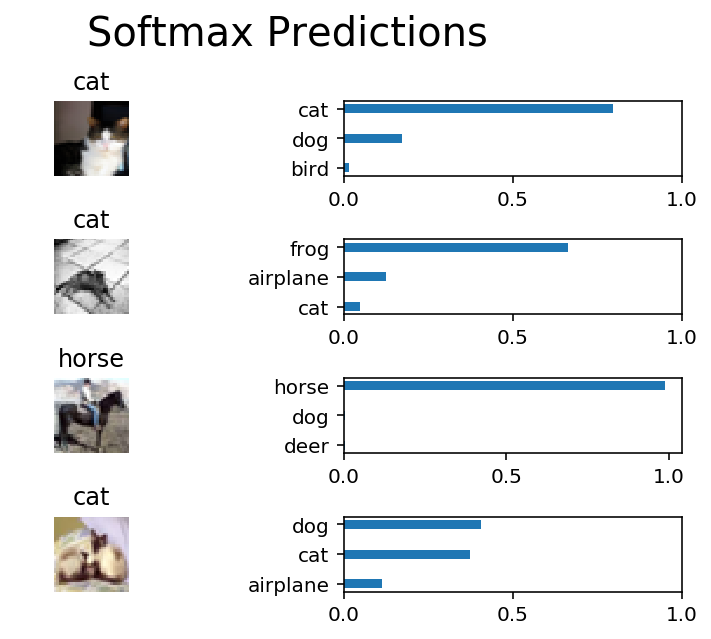

In [48]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.